In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('insurance.csv')

In [4]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Exploratory Data Analysis

In [19]:
from pandas_profiling import ProfileReport
report=ProfileReport(dataset)
report.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


### Columns

In [14]:
print(dataset.columns)
print("\nTotal number of values in the dataset is :",dataset.__len__())

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Total number of values in the dataset is : 1338


### Checking For null Values

<AxesSubplot:>

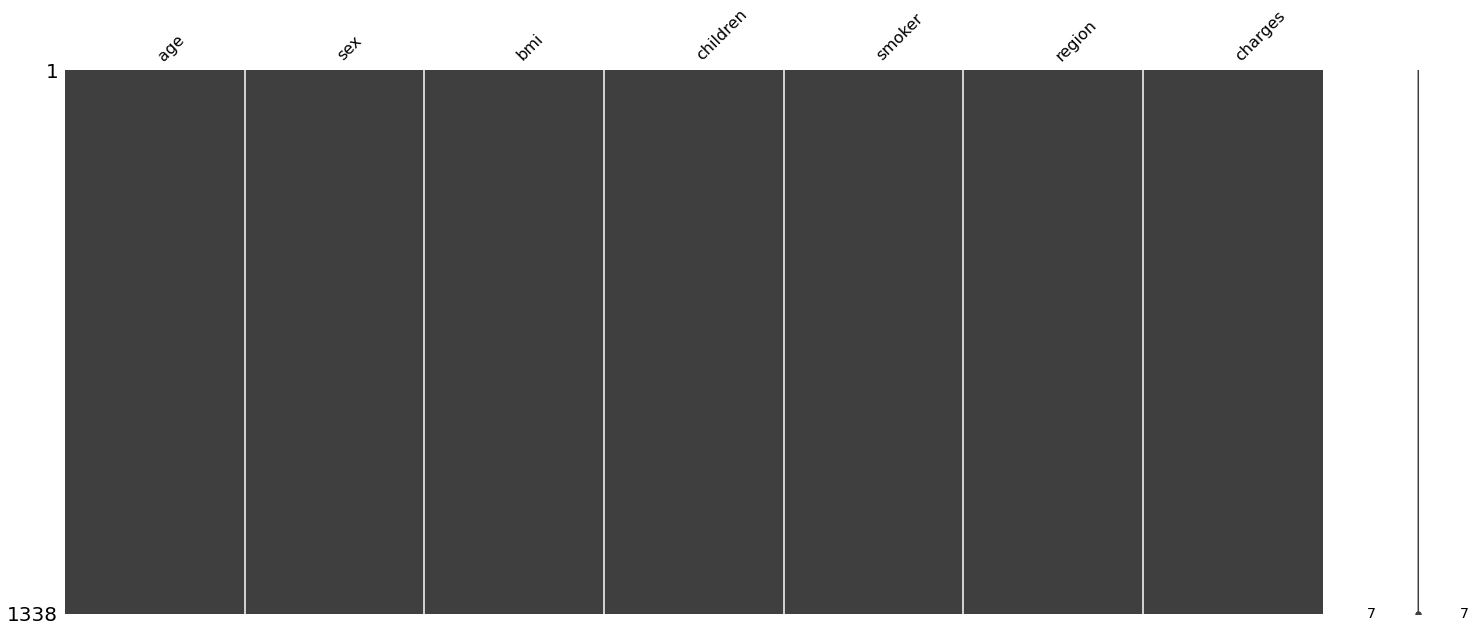

In [7]:
import missingno as msno
msno.matrix(dataset)

In [8]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
### There are no null values in the dataset

### Removing Missing Data (Optional)

In [10]:
import numpy as np
dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Encoding

In [15]:
cat_cols = [col for col in dataset.columns if col not in dataset.describe().columns]

In [17]:
print('we have the following categorical columns:',cat_cols)

we have the following categorical columns: ['sex', 'smoker', 'region']
